In [7]:
import os
import time
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

In [22]:
df = pd.read_csv ('data_for_modeling.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)

     height  grain_size     density  temperature    HH_amp
0        83    1.375000  249.388889    -5.710000  0.107583
1        77    1.571429  289.187500    -4.822222  0.107583
2        81    2.150000  263.142857    -5.488889  0.142749
3        75    1.416667  302.833333    -6.577778  0.083195
4        96    1.750000  277.833333    -5.990909  0.100066
..      ...         ...         ...          ...       ...
120     141    1.350000  336.511111    -0.611765  0.191472
121     130    1.277778  332.000000    -0.692857  0.172763
122     107    1.611111  319.378788    -2.284615  0.172763
123     109    1.812500  334.066667    -0.275000  0.172763
124     121    1.785714  352.121212    -0.300000  0.172763

[125 rows x 5 columns]


In [23]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [24]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_dataset.drop(columns=['HH_amp']))
train_y = train_dataset['HH_amp']
test_x = scaler.transform(test_dataset.drop(columns=['HH_amp']))
test_y = test_dataset['HH_amp']

In [69]:
rf = RandomForestRegressor(n_estimators=2, max_depth=5,random_state=0)
rf.fit(train_x, train_y)

RandomForestRegressor(max_depth=5, n_estimators=2, random_state=0)

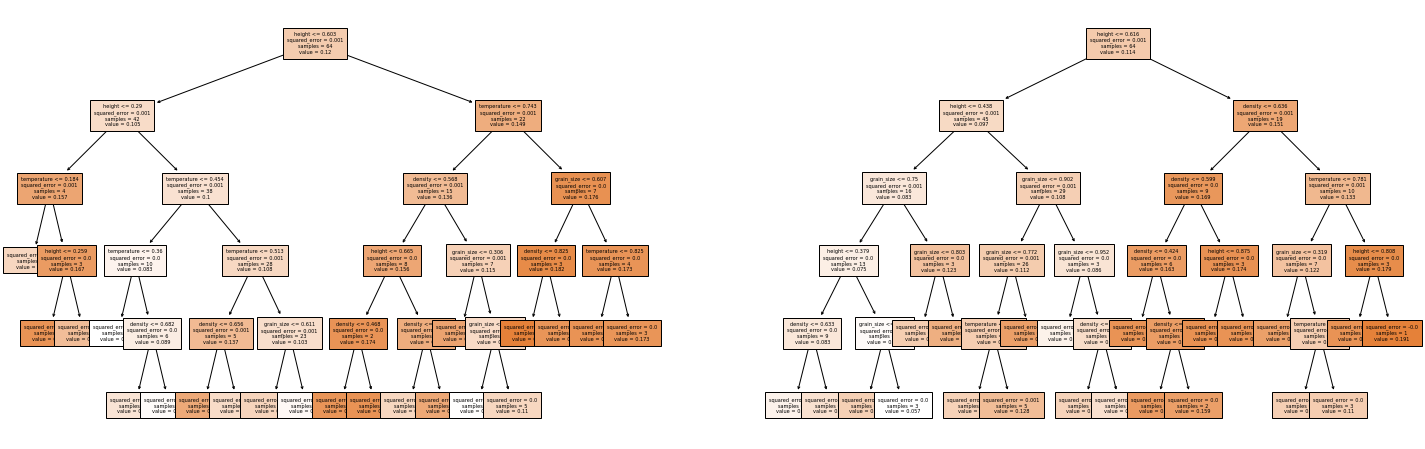

In [80]:
features = list((train_dataset.columns[:-1]))

plt.figure(figsize = (25, 8))

plt.subplot(121)
plot_tree(rf.estimators_[0], 
          filled = True, 
          fontsize = 5, 
         feature_names= features)

plt.subplot(122)
plot_tree(rf.estimators_[1], 
          filled = True, 
          fontsize = 5, 
         feature_names= features)

plt.show()

In [78]:
pred = rf.predict(test_x)
error = mean_squared_error(test_y, pred, squared=False)
print(error)

0.036370929774748414


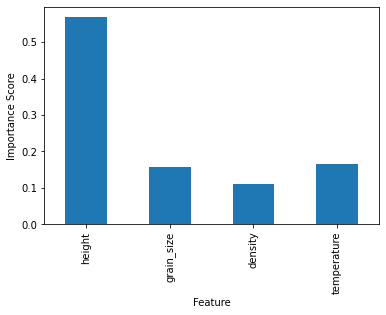

In [79]:
feature_impotanceRF = pd.Series(rf.feature_importances_, index=features)
feature_impotanceRF.plot(kind = 'bar')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.show()